Given a dataset that contains information about different types of flowers (e.g., Iris
dataset), perform classification using the k-Nearest Neighbors (kNN) algorithm. Evaluate the
performance of the model by calculating its accuracy and visualize the results using appropriate
techniques.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
iris = datasets.load_iris()

In [20]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target

In [21]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

Training Data and classifing based on KNN Algorithm.

In [22]:
X = df.drop(['target'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


Visualiasation of the normal and result.

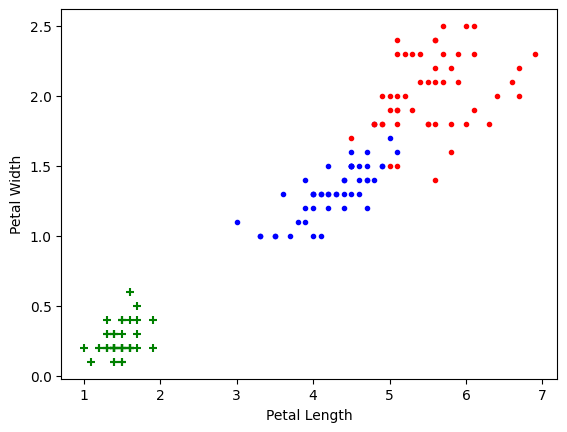

In [23]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color="red",marker='.')

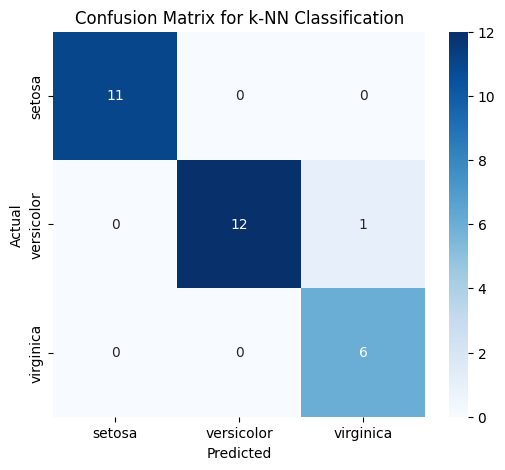

In [24]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


# Visualize the confusion matrix using Seaborn heatmap (simplified)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for k-NN Classification')
plt.show()

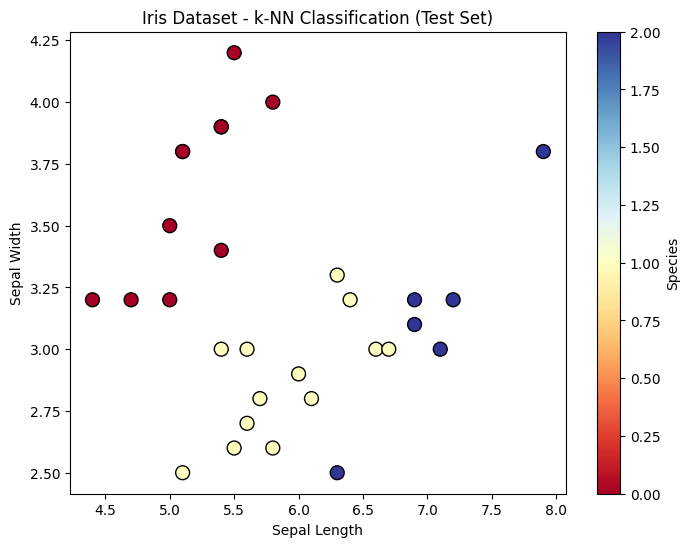

In [32]:
# Let's reduce to two features (sepal length and sepal width) for easy plotting
X_reduced = X.iloc[:, :2]  # Sepal length and sepal width
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=1)

knn_reduced = KNeighborsClassifier(n_neighbors=3)
knn_reduced.fit(X_train_reduced, y_train)

# Plot the data points (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(X_test_reduced.iloc[:, 0], X_test_reduced.iloc[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o', s=100)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset - k-NN Classification (Test Set)')
plt.colorbar(label='Species')
plt.show()